In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# For date-time operations
import datetime


In [6]:
import pickle
import joblib
extract_dir='/kaggle/input/fraud-dataset/data'
extracted_files = os.listdir('/kaggle/input/fraud-dataset/data') 
# Load all .pkl files in the extracted directory
pkl_files = [file for file in extracted_files if file.endswith('.pkl')]

# Initialize an empty list to hold data
data_list = []

# Loop through the .pkl files and load them
for pkl_file in pkl_files:
    with open(os.path.join(extract_dir, pkl_file), 'rb') as f:
        data = joblib.load(f)
        data_list.append(data)

# Display the loaded data from the first .pkl file (for example)
print(data_list[0])  # Adjust based on the type of data you expect


        TRANSACTION_ID         TX_DATETIME CUSTOMER_ID TERMINAL_ID  TX_AMOUNT   
843768          843768 2018-06-28 00:00:31        1759        5674      86.86  \
843769          843769 2018-06-28 00:01:05        1038        6405     118.32   
843770          843770 2018-06-28 00:01:43        1858         282       7.36   
843771          843771 2018-06-28 00:04:36        1221          48     116.11   
843772          843772 2018-06-28 00:05:48        1931        4700      86.03   
...                ...                 ...         ...         ...        ...   
853456          853456 2018-06-28 23:55:52         752        8547      18.05   
853457          853457 2018-06-28 23:55:56         320        6682       2.11   
853458          853458 2018-06-28 23:56:08        3888         975      46.83   
853459          853459 2018-06-28 23:57:00        2696        3031      40.21   
853460          853460 2018-06-28 23:58:21        2952        4143      16.84   

       TX_TIME_SECONDS TX_T

In [7]:
import pandas as pd

# If the pkl file contains a pandas dataframe
df_list = []

for pkl_file in pkl_files:
    with open(os.path.join(extract_dir, pkl_file), 'rb') as f:
        df = pd.read_pickle(f)
        df_list.append(df)

# Concatenate all DataFrames if they are parts of a larger dataset
full_df = pd.concat(df_list, ignore_index=True)

# Show the first few rows
full_df.head()


/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,843768,2018-06-28 00:00:31,1759,5674,86.86,7603231,88,0,0
1,843769,2018-06-28 00:01:05,1038,6405,118.32,7603265,88,0,0
2,843770,2018-06-28 00:01:43,1858,282,7.36,7603303,88,0,0
3,843771,2018-06-28 00:04:36,1221,48,116.11,7603476,88,0,0
4,843772,2018-06-28 00:05:48,1931,4700,86.03,7603548,88,0,0


In [8]:
# Check the basic info and missing values in the dataset
full_df.info()
full_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB


TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [9]:
# Drop any rows with missing values (if present)
df = full_df.dropna()

# Convert TX_DATETIME to a datetime object
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

# Convert categorical columns CUSTOMER_ID, TERMINAL_ID to numeric or category type
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype('category').cat.codes
df['TERMINAL_ID'] = df['TERMINAL_ID'].astype('category').cat.codes

# Preview the changes
df.head()


/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,843768,2018-06-28 00:00:31,1757,5674,86.86,7603231,88,0,0
1,843769,2018-06-28 00:01:05,1037,6405,118.32,7603265,88,0,0
2,843770,2018-06-28 00:01:43,1856,282,7.36,7603303,88,0,0
3,843771,2018-06-28 00:04:36,1220,48,116.11,7603476,88,0,0
4,843772,2018-06-28 00:05:48,1929,4700,86.03,7603548,88,0,0


In [10]:
# Extract new features from TX_DATETIME
df['TX_DAY'] = df['TX_DATETIME'].dt.day
df['TX_MONTH'] = df['TX_DATETIME'].dt.month
df['TX_YEAR'] = df['TX_DATETIME'].dt.year
df['TX_HOUR'] = df['TX_DATETIME'].dt.hour

# Drop TX_DATETIME as it's no longer needed
df = df.drop(columns=['TX_DATETIME'])

# Preview the new features
df.head()


/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DAY,TX_MONTH,TX_YEAR,TX_HOUR
0,843768,1757,5674,86.86,7603231,88,0,0,28,6,2018,0
1,843769,1037,6405,118.32,7603265,88,0,0,28,6,2018,0
2,843770,1856,282,7.36,7603303,88,0,0,28,6,2018,0
3,843771,1220,48,116.11,7603476,88,0,0,28,6,2018,0
4,843772,1929,4700,86.03,7603548,88,0,0,28,6,2018,0


In [11]:
# Separate features (X) and target (y)
X = df.drop(columns=['TRANSACTION_ID', 'TX_FRAUD'])
y = df['TX_FRAUD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1227908, 10), (526247, 10), (1227908,), (526247,))

In [12]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


Accuracy: 1.0
Confusion Matrix:
[[521843      0]
 [     0   4404]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    521843
           1       1.00      1.00      1.00      4404

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



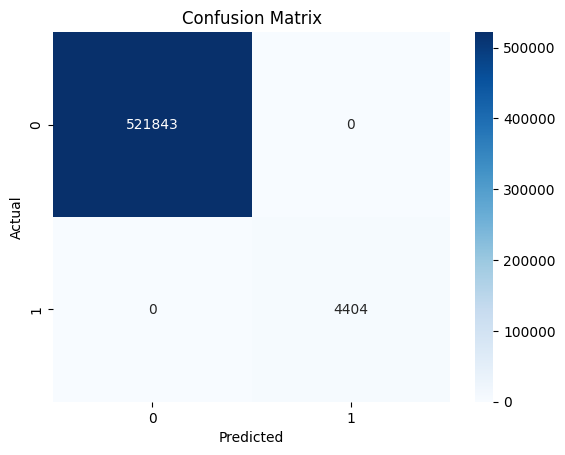

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [15]:
import joblib

# Assuming your model is called 'model'
model_filename = 'fraud_detection_model.joblib'

# Save the model
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to fraud_detection_model.joblib
